<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#523887; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">look at me....😂 </h1>

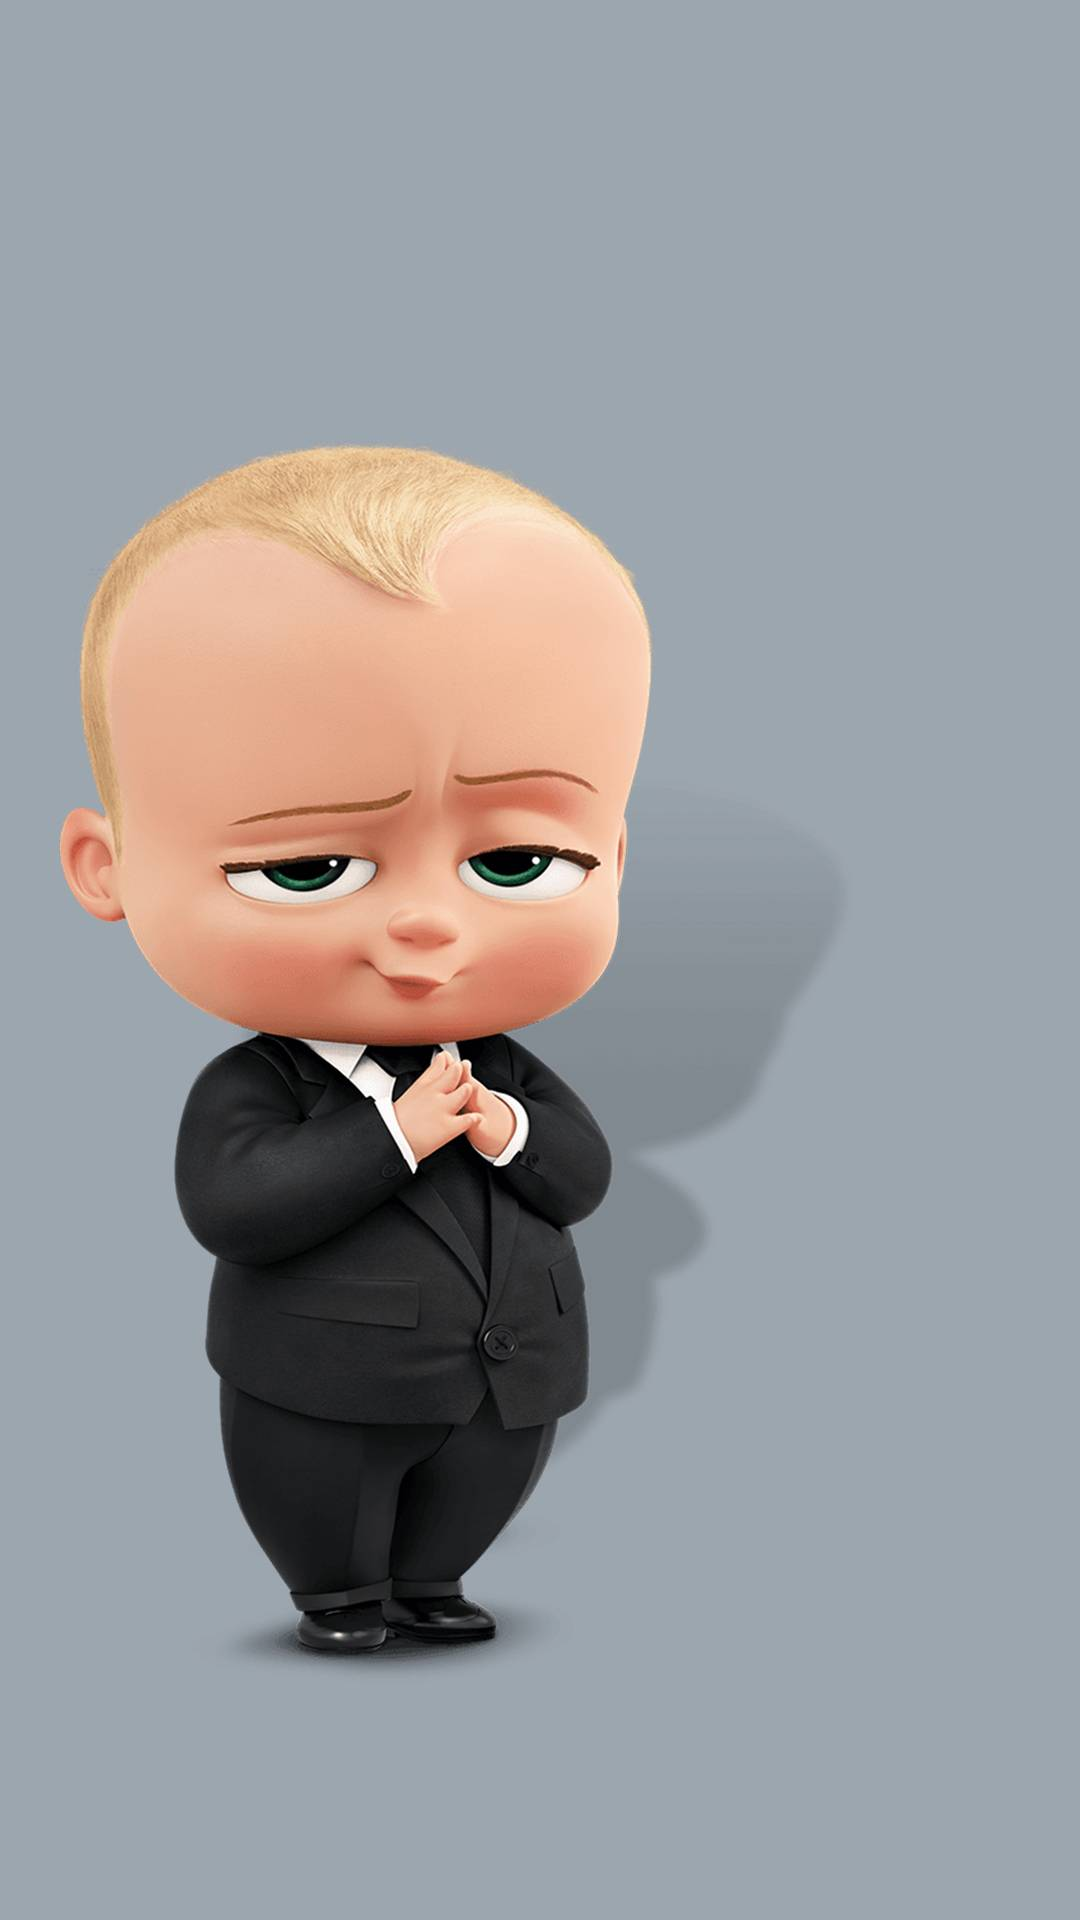

In [1]:
from IPython.display import Image, display

# Path to the uploaded image
image_path = '/kaggle/input/limited/7895_uhd.jpg'

# Display the image
display(Image(filename=image_path))


<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#523887; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">import libraries </h1>

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import tensorflow as tf
import matplotlib as plt
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, optimizers


2024-08-16 14:48:57.576316: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-16 14:48:57.576431: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-16 14:48:57.824481: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#523887; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">load and preprocess the images </h1>

In [3]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/intel-image-classification/seg_train/seg_train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/intel-image-classification/seg_test/seg_test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [4]:
class_names = train_ds.class_names
print(class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


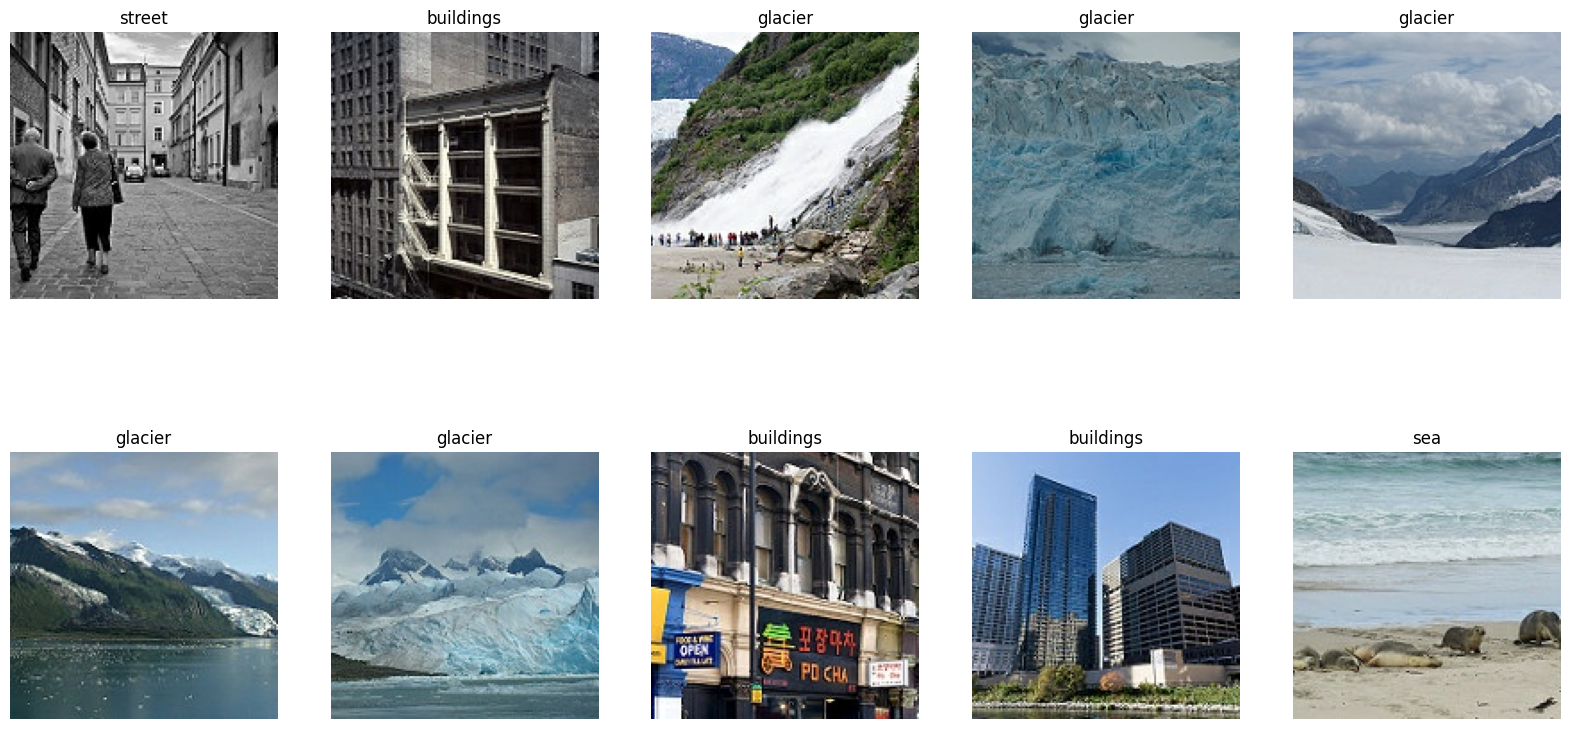

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
for images, labels in train_ds.take(1):
    for i in range(10):
        ax = plt.subplot(2, 5, i + 1) 
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show() 


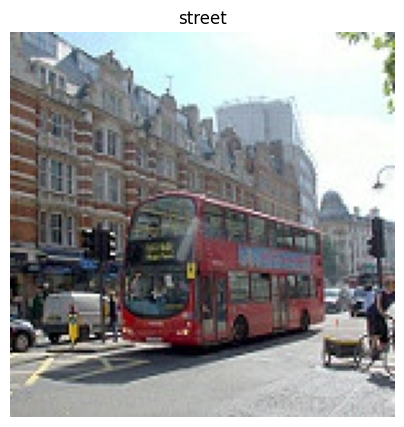

Pixel values:
 [[[121 116 120]
  [123 119 120]
  [144 136 133]
  ...
  [ 84  92  94]
  [ 96 106 108]
  [117 127 129]]

 [[138 136 139]
  [142 141 139]
  [150 147 140]
  ...
  [123 133 125]
  [117 128 122]
  [ 67  78  74]]

 [[114 118 117]
  [127 129 124]
  [140 143 132]
  ...
  [184 196 174]
  [ 90 103  83]
  [119 132 114]]

 ...

 [[161 162 157]
  [159 160 155]
  [160 161 156]
  ...
  [191 191 193]
  [187 187 189]
  [187 187 189]]

 [[163 164 159]
  [158 159 154]
  [159 160 155]
  ...
  [196 196 198]
  [202 202 204]
  [207 207 209]]

 [[166 167 162]
  [158 159 154]
  [160 161 156]
  ...
  [193 193 195]
  [182 182 184]
  [171 171 173]]]


In [6]:
for images, labels in train_ds.take(1):  # Take one batch from the dataset
    image = images[0].numpy().astype("uint8")
        
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.title(class_names[labels[0]])
    plt.axis("off")
    plt.show() 
    plt.show()
    
    # Display the pixel values
    print("Pixel values:\n", image)


In [7]:
# Standardize the datasets
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
validation_ds = validation_ds.map(lambda x, y: (normalization_layer(x), y))

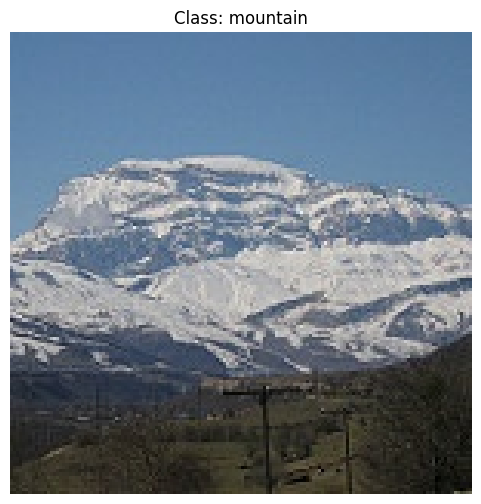

Normalized pixel values:
 [[[0.32941177 0.4784314  0.6313726 ]
  [0.32156864 0.47058827 0.62352943]
  [0.32156864 0.47058827 0.62352943]
  ...
  [0.30980393 0.45882356 0.6039216 ]
  [0.30980393 0.45882356 0.6039216 ]
  [0.30980393 0.45882356 0.6039216 ]]

 [[0.33333334 0.48235297 0.63529414]
  [0.3254902  0.47450984 0.627451  ]
  [0.3254902  0.47450984 0.627451  ]
  ...
  [0.30980393 0.45882356 0.6039216 ]
  [0.30980393 0.45882356 0.6039216 ]
  [0.30980393 0.45882356 0.6039216 ]]

 [[0.3372549  0.48627454 0.6392157 ]
  [0.32941177 0.4784314  0.6313726 ]
  [0.32941177 0.4784314  0.6313726 ]
  ...
  [0.3137255  0.46274513 0.60784316]
  [0.30980393 0.45882356 0.6039216 ]
  [0.30980393 0.45882356 0.6039216 ]]

 ...

 [[0.17254902 0.16470589 0.11764707]
  [0.16470589 0.15686275 0.10980393]
  [0.19607845 0.18823531 0.14117648]
  ...
  [0.07450981 0.07058824 0.0627451 ]
  [0.08235294 0.07843138 0.0627451 ]
  [0.05490196 0.0509804  0.03529412]]

 [[0.19607845 0.18823531 0.14117648]
  [0.219607

In [8]:
# Get one batch of normalized images and labels from the dataset
for images, labels in train_ds.take(1):
    # Select the first image and its label
    image = images[0].numpy()
    label = labels[0]
    
    # Display the image
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(f"Class: {class_names[label]}")
    plt.axis("off")
    plt.show()
    
    # Display the pixel values
    print("Normalized pixel values:\n", image)


<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#523887; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">model building </h1>

In [9]:
# Create an input layer
input_layer = tf.keras.layers.Input(shape=(150, 150, 3)) 

# CNN model building
model = tf.keras.Sequential([
    input_layer,  # Input layer
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),  # Convolutional layer
#     layers.BatchNormalization(),  
    layers.MaxPooling2D(2, 2),  # Pooling layer
    layers.Dropout(0.25),  # Dropout layer
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),  # Convolutional layer
#     layers.BatchNormalization(),  # Batch Normalization layer
    layers.MaxPooling2D(2, 2),  # Pooling layer
    layers.Dropout(0.25),  # Dropout layer
    
#     Uncomment if you want to use this third convolutional block
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),  # Convolutional layer
#     layers.BatchNormalization(),  # Batch Normalization layer
    layers.MaxPooling2D(2, 2),  # Pooling layer
    layers.Dropout(0.25),  # Dropout layer

    layers.Flatten(),  # Flatten layer
    
    layers.Dense(128, activation='relu'),  # Fully connected layer
#     layers.BatchNormalization(),  # Batch Normalization layer
    layers.Dropout(0.5),  # Dropout layer
    
    layers.Dense(10, activation='softmax')  # Output layer
])


<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#523887; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">summery </h1>

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,642 (18.42 MB)

 Trainable params: 4,829,642 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#523887; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">compile </h1>

In [11]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#523887; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">fit </h1>

In [12]:
# Train the model
history = model.fit(
    train_ds,
    batch_size=32,
    validation_data=validation_ds,
    epochs=20
)


Epoch 1/20
  5/439 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.1434 - loss: 3.2907

I0000 00:00:1723819780.750726      79 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1723819780.770941      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.4281 - loss: 1.5264

W0000 00:00:1723819810.122254      80 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


439/439 ━━━━━━━━━━━━━━━━━━━━ 49s 81ms/step - accuracy: 0.4283 - loss: 1.5257 - val_accuracy: 0.6577 - val_loss: 0.9088
Epoch 2/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.6462 - loss: 0.9230 - val_accuracy: 0.7353 - val_loss: 0.7434
Epoch 3/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.7143 - loss: 0.7894 - val_accuracy: 0.7940 - val_loss: 0.6064
Epoch 4/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.7599 - loss: 0.6612 - val_accuracy: 0.8087 - val_loss: 0.5317
Epoch 5/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.7889 - loss: 0.5886 - val_accuracy: 0.8177 - val_loss: 0.5228
Epoch 6/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.8042 - loss: 0.5424 - val_accuracy: 0.8137 - val_loss: 0.5663
Epoch 7/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.8216 - loss: 0.4837 - val_accuracy: 0.8287 - val_loss: 0.4842
Epoch 8/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.8434 - loss: 0.4289 - val_accurac

In [13]:
# Evaluate the model
test_loss, test_acc = model.evaluate(validation_ds)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8436 - loss: 0.6334
Test Loss: 0.6321159601211548
Test Accuracy: 0.846666693687439


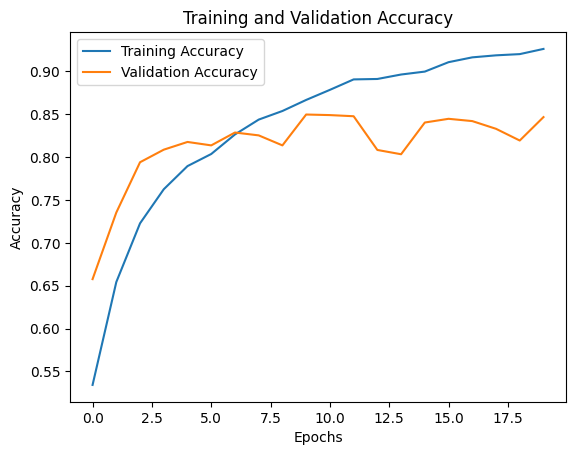

In [14]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


**The model is overfit but in the next version , i will try to reduce overfitting and improve the perfomance the model in the next version**

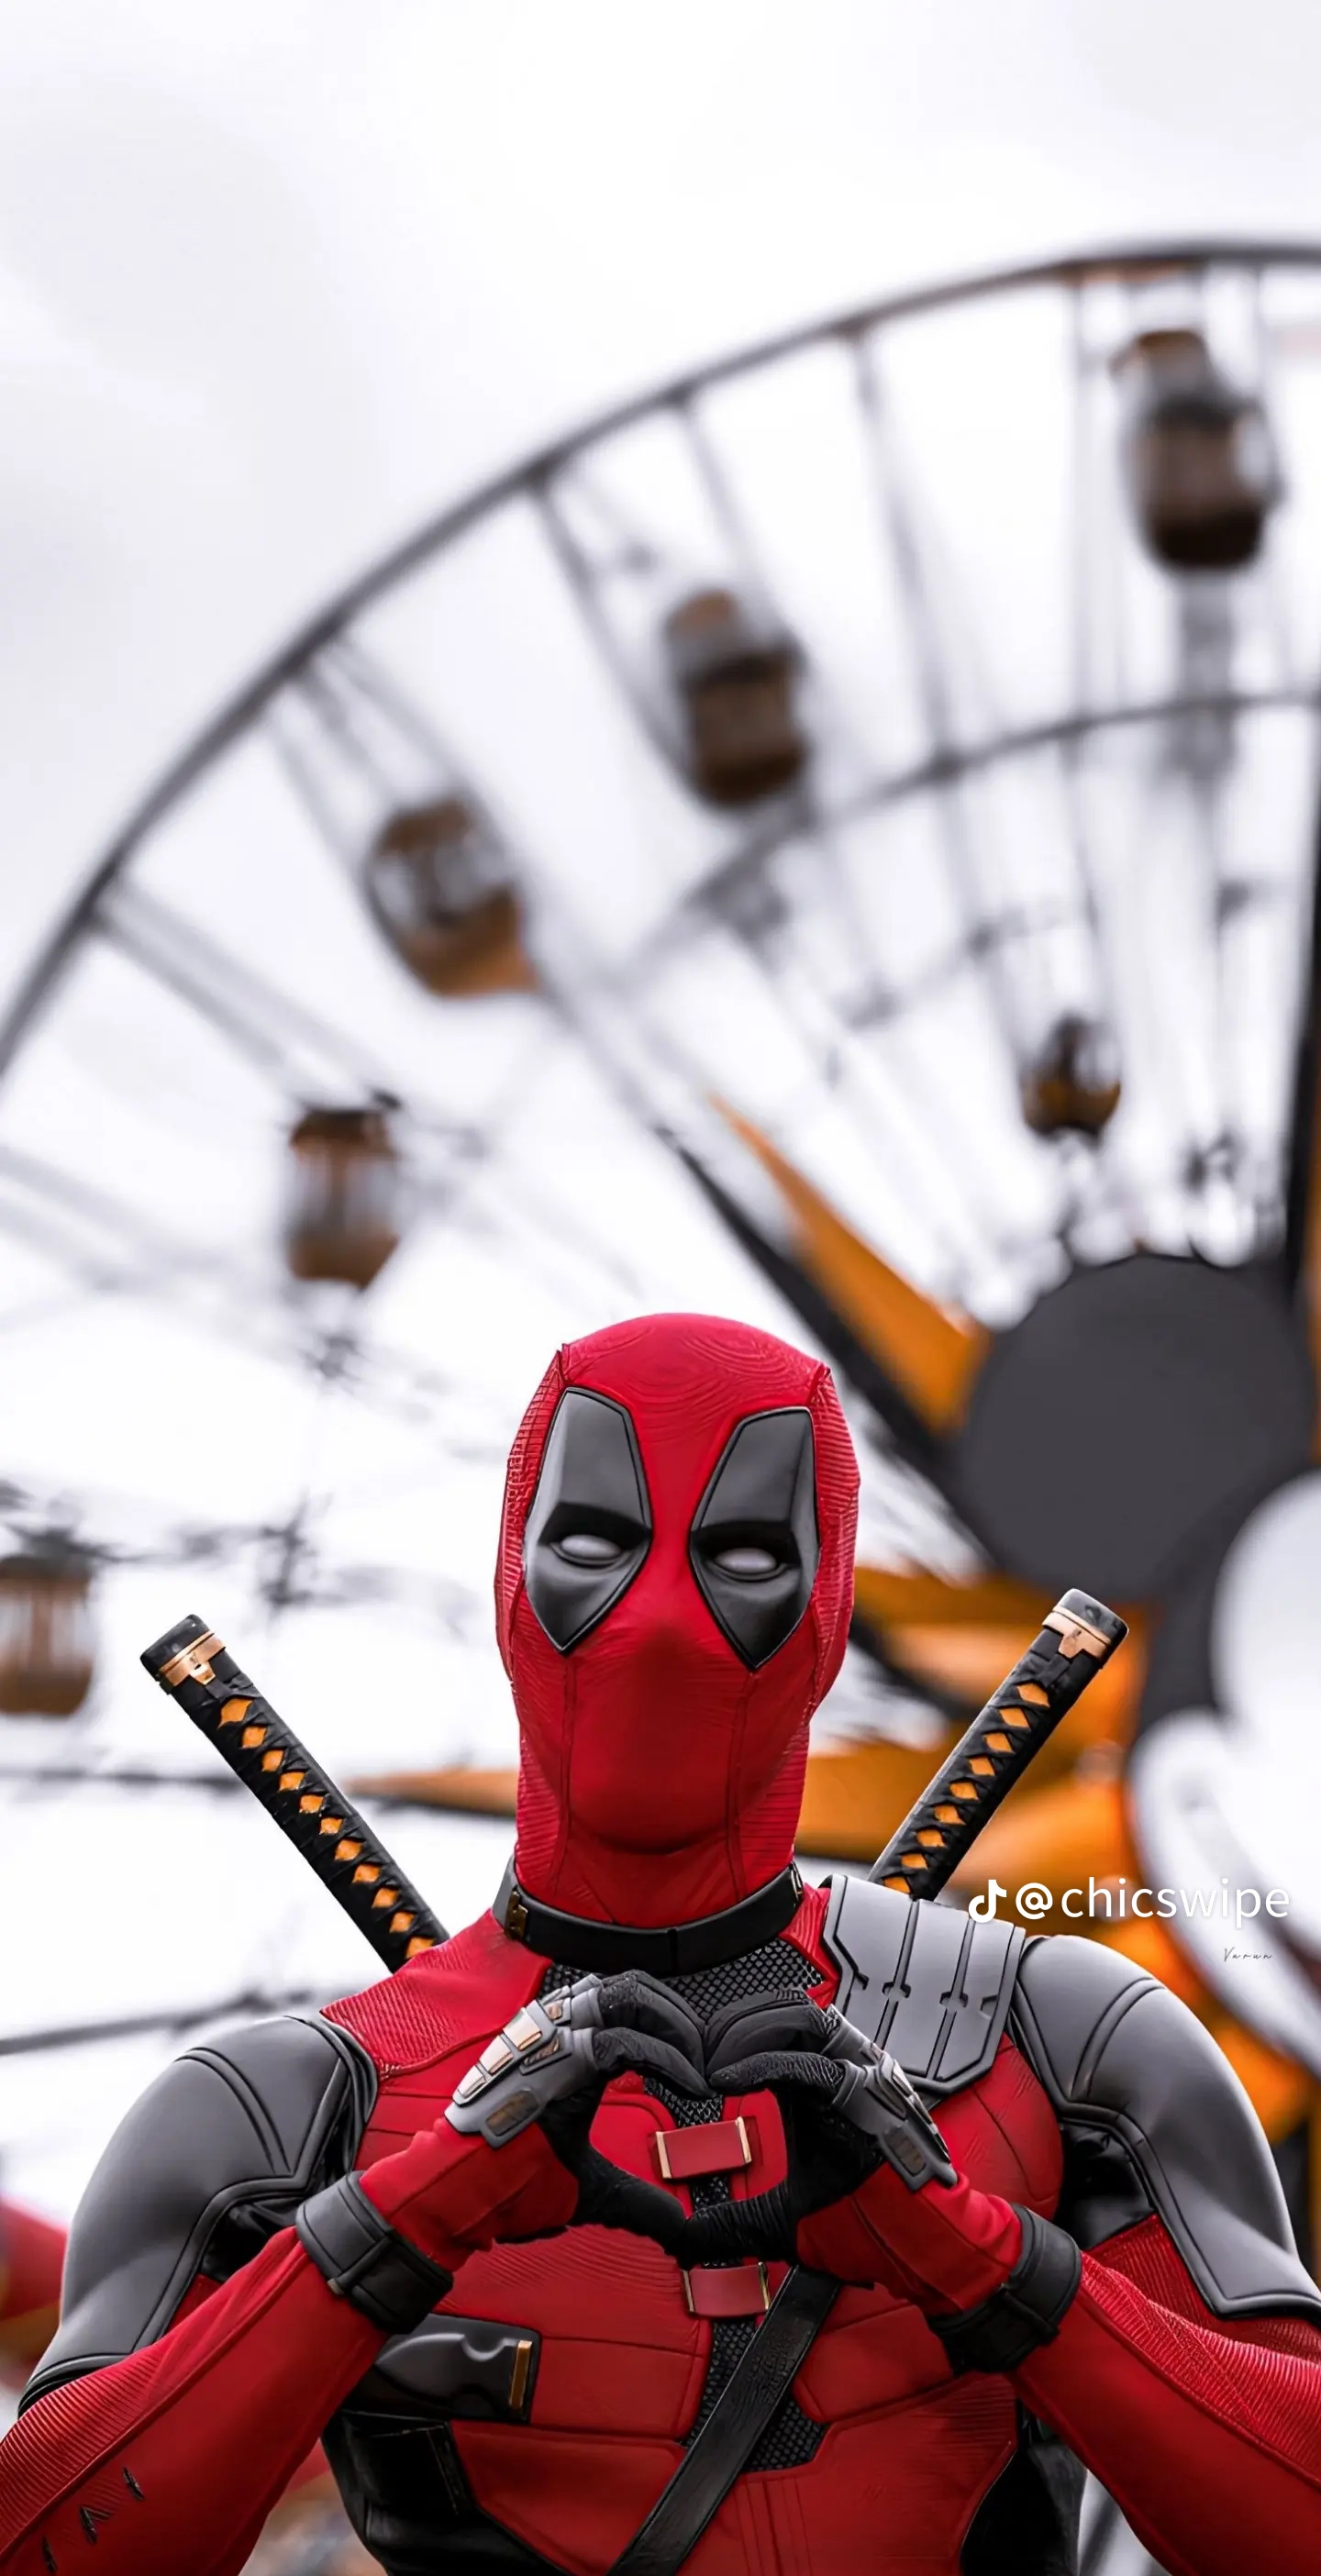

In [15]:
from IPython.display import Image, display

# Path to the uploaded image
image_path = '/kaggle/input/limited/690637e373f0b1c9f8f532e16d8ce03c.png'

# Display the image
display(Image(filename=image_path))